[View in Colaboratory](https://colab.research.google.com/github/cavaughan99/Linear-regression-python/blob/master/Linear_regression_python.ipynb)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/cavaughan99/Data/master/boston.csv")

df.info()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [2]:
#fit a simple OLS linear regression model with lstat as predictor and medv as response using statsmodels
#lstat = percent of households in neighborhood of low socioeconomic status
#medv = median price of homes in neighborhood
X = df['LSTAT']

#add a a column of 1s so that model will have intercept--statsmodels estimates no intercept model by default\n",
X = sm.add_constant(X)
y = df['MV']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           5.08e-88
Time:                        23:19:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [3]:
df['LSTAT'].corr(df['MV'])

-0.7376627294671607

In [4]:
#fit a simple linear regression model using scikit learn\n",
X = df[["LSTAT"]]
y = df["MV"]

model = linear_model.LinearRegression()
results = model.fit(X, y)

#print coefficients
print(results.intercept_, results.coef_)
   


34.55384101027772 [-0.95004936]


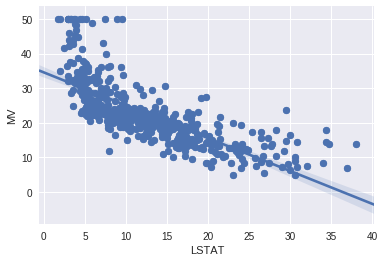

In [5]:
# plot x and observed y
plt.scatter(df['LSTAT'], df['MV'])
plt.xlabel("lower SES")
plt.ylabel("median value of home")

# plot regression line
sns.regplot(x="LSTAT", y="MV", data=df)

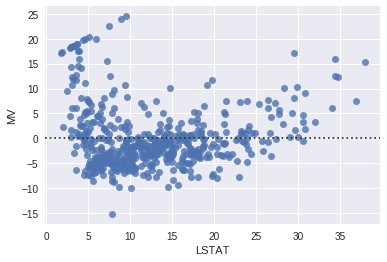

In [6]:
# plot model residuals
sns.residplot(x="LSTAT", y="MV", data=df)

In [7]:
# estimate multiple regression with all variables other than mv as predictors using scikit learn
X = df.drop("MV", axis=1).values
y = df["MV"].values

model = linear_model.LinearRegression()
results = model.fit(X, y)
    
#print coefficients
print(results.intercept_, results.coef_)


36.45949145783325 [-1.08011353e-01  4.64204559e-02  2.05586761e-02  2.68673389e+00
 -1.77666149e+01  3.80986498e+00  6.92223926e-04 -1.47556679e+00
  3.06049515e-01 -1.23345932e-02 -9.52747256e-01  9.31168341e-03
 -5.24758397e-01]


In [8]:
# estimate multiple regression with all variables other than mv as predictors using statsmodels\n",
X = df[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PT","B","LSTAT"]]
y = df["MV"]

X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.72e-135
Time:                        23:19:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PT            -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [10]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Inspect VIF factors
print(vif.round(2))

    VIF Factor features
0       585.27    const
1         1.79     CRIM
2         2.30       ZN
3         3.99    INDUS
4         1.07     CHAS
5         4.39      NOX
6         1.93       RM
7         3.10      AGE
8         3.96      DIS
9         7.48      RAD
10        9.01      TAX
11        1.80       PT
12        1.35        B
13        2.94    LSTAT


In [11]:
#Predict the salary of a female with IQ of 110 and a GPA of 4.0 (in thousands of dollars)
#intercept = 50
# GPA: B1 = 20
# IQ: B2 = .07
# Gender (1 for female and 0 for male): B3 = 35
# Interaction between GPA and IQ: B4 = .01
# Interaction between GPA and gender: B5 = -10
50+(20*4)+(.07*110)+35+(.01*110*4)+(-10*4)

137.1

In [12]:
# perform simple linear regression on the Auto dataset\n",
auto = pd.read_csv("https://raw.githubusercontent.com/cavaughan99/Data/master/Auto.csv")

auto.info()
auto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
hp_num          392 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 31.1+ KB


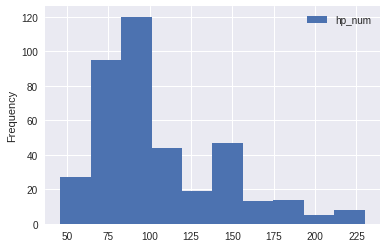

In [13]:
#coerce values from string to numeric
auto['hp_num'] = pd.to_numeric(auto['horsepower'], errors='coerce')

#check to see if variable was successfully converted to numeric type
auto.info()

# examine histogram of horsepower
auto.plot(y='hp_num', kind='hist')
plt.show()

In [14]:
# examine basic descriptives
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin,hp_num
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,392.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307,104.469388
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549,38.491160
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,46.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000,75.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000,93.500000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000,126.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,230.000000


In [15]:
# impute missing values of horsepower with sample mean
auto['hp_num'] = auto['hp_num'].fillna(104.47)

# check to see that missing data were successfully imputed for horsepower
auto['hp_num'].mean()

104.46939546599498

In [16]:
# estimate simple linear regression predicting mpg from horsepower using statsmodels
X = auto['hp_num']
#add a a column of 1s so that model will have intercept--statsmodels estimates no intercept model by default
X = sm.add_constant(X)
y = auto['mpg']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Horsepower is negatively associated with miles per gallon such that a one-unit increase in horsepower is
# associated with a .16 decrease in miles per gallon. This is a fairly strong relationship (or at least it is
# within the context of social science research--not sure whether this would count as strong in the realm of
# research on cars), as evidenced by the R^2 of .6, which indicates that 60% of the variance in mpg is explained 
# by horsepower. The F-statistic of 580.6 indicates that this relationship is statistically significant (p < .05),
# and so we can reject the null hypothesis that horsepower is unrelated to mpg."

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           1.45e-79
Time:                        23:20:40   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0

In [17]:
# This model predicts that a car with a horsepower of 98 will get 40.0058 + 98*-.1578 = 24.5414, or roughly 25
# miles per gallon.

print(results.params[0] + results.params[1]*98)

24.537028832432682


In [18]:
#enter coefficients from model directly into regression equation with 98 entered for X to predict mpg.
40.0058 + 98*-.1578

24.541400000000003

In [19]:
#fit a simple linear regression model using scikit learn
X = auto[["hp_num"]]
y = auto["mpg"]

model = linear_model.LinearRegression()
results = model.fit(X, y)
    
#print coefficients
print(results.intercept_, results.coef_)

40.005809860962984 [-0.1578447]


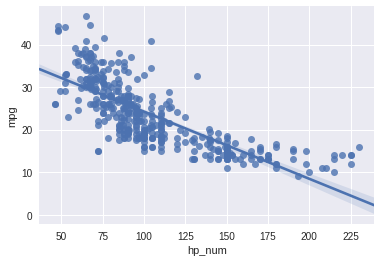

In [20]:
# plot regression line
sns.regplot(x="hp_num", y="mpg", data=auto)

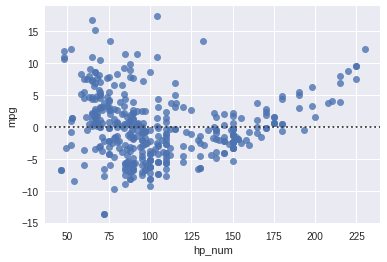

In [21]:
# plot model residuals
sns.residplot(x="hp_num", y="mpg", data=auto)


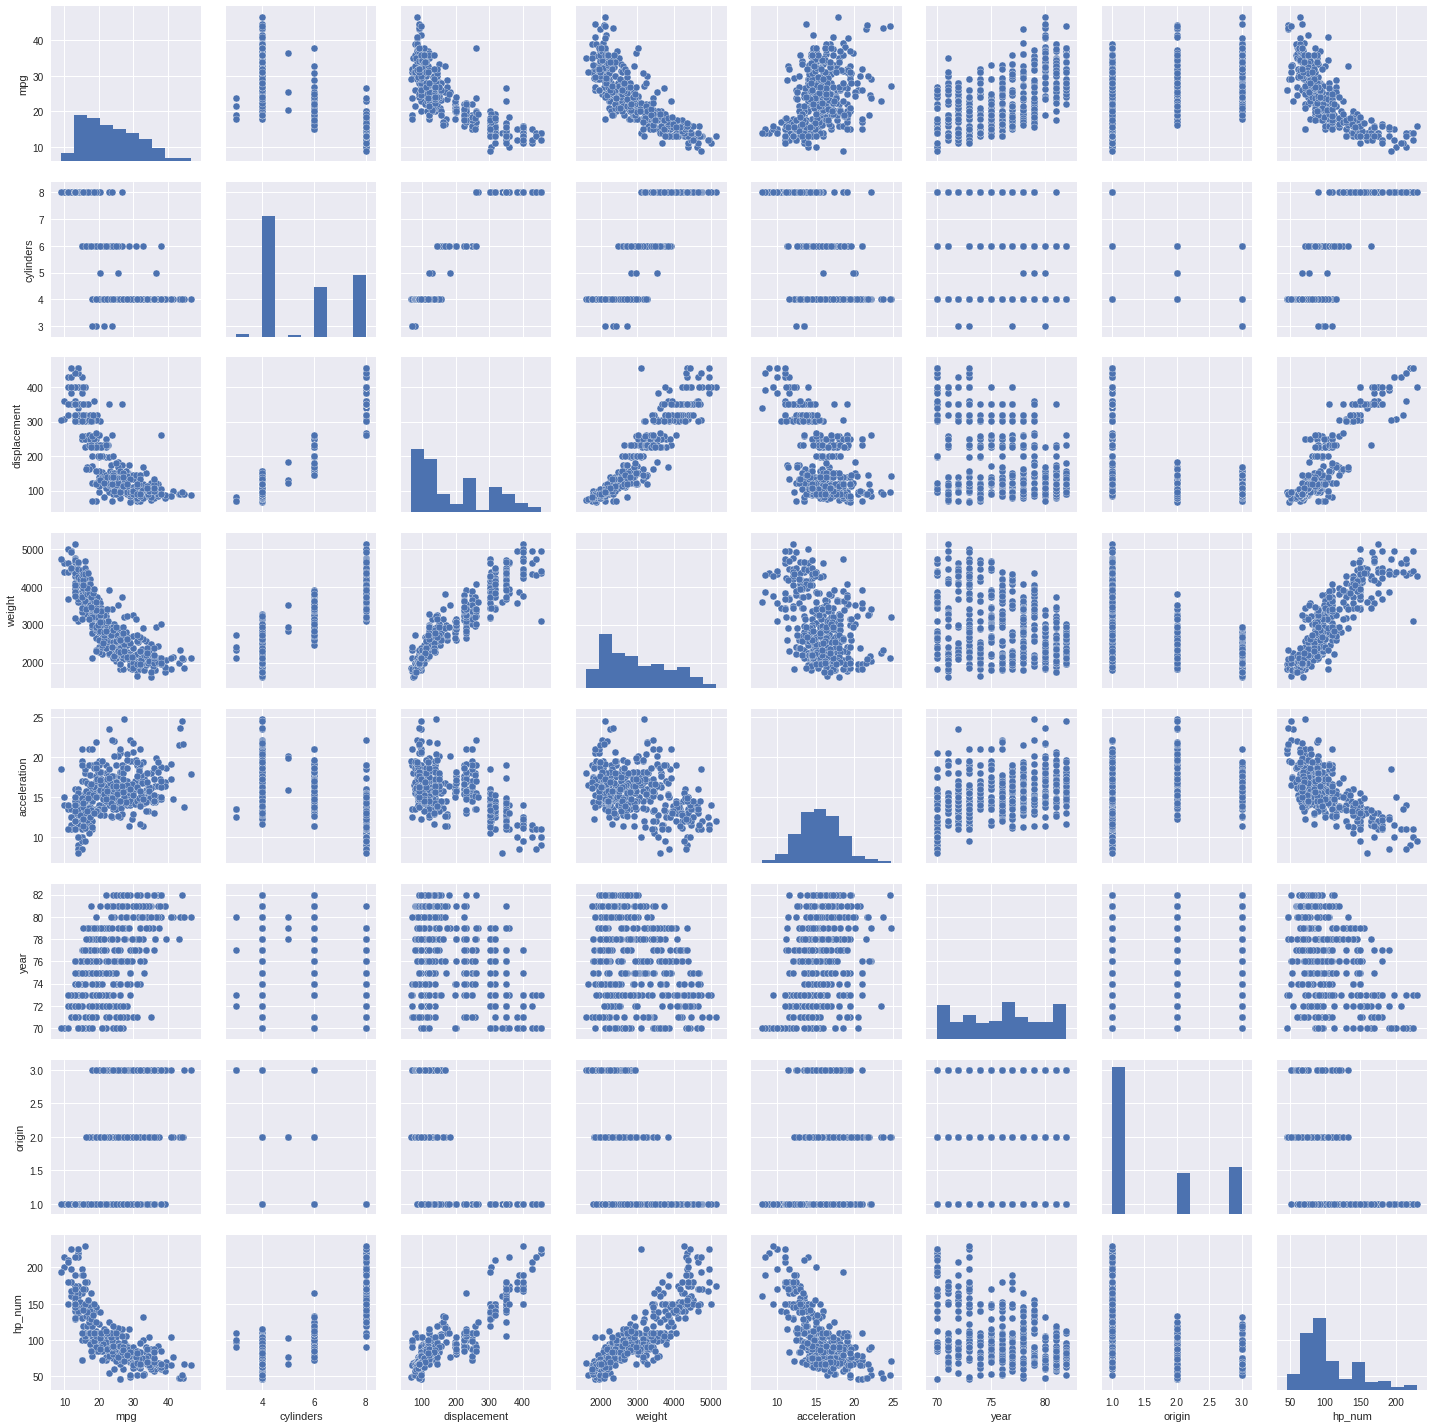

In [22]:
# produce scatterplot matrix for all variables in the df
   
# basic correlogram in seaborn
    
sns.pairplot(auto)


In [23]:
#CORRELATIONS
# use pearsonr function from scipy.stats.stats to compute correlation between one pair of variables
x = auto['mpg']
y = auto['cylinders']
r1 = pearsonr(x, y)
print(r1)
    
# use corr function from pandas to compute correlations between all numeric variables in df
auto.drop(['name', 'horsepower'], axis=1).corr(method='pearson')

(-0.7762599479784421, 3.669161888686121e-81)


,mpg,cylinders,displacement,weight,acceleration,year,origin,hp_num
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,-0.771441
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,0.839715
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,0.893833
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,0.860580
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,-0.687039
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,-0.413022
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,-0.453962
hp_num,-0.771441,0.839715,0.893833,0.860580,-0.687039,-0.413022,-0.453962,1.000000


In [24]:
#multiple linear reg with mpg as the response and all other vars except name as predictors using statsmodels
    
# origin is a nominal variable (coded 1, 2, 3); recode to create 2 dummy-coded vars and 
# use 1 (the most frequent category) as the reference group
print(pd.value_counts(auto['origin']))

# interpretation of origin variable:
# 1 = United States ("USA") 
# 2 = Europe
# 3 = Japan

def recode_origin2(origin_var):
   
# Return 1 if origin_var == 2
    if origin_var == 2:
        return 1
    elif origin_var == 1 or origin_var == 3:
        return 0
    else:
        return np.nan
    
auto['origin_2'] = auto.origin.apply(recode_origin2)
    
print(pd.value_counts(auto['origin_2']))
    
def recode_origin3(origin_var):
   
    if origin_var == 3:
        return 1
    elif origin_var == 1 or origin_var == 2:
        return 0
    else:
        return np.nan
   
auto['origin_3'] = auto.origin.apply(recode_origin3)
   
print(pd.value_counts(auto['origin_3']))


1    248
3     79
2     70
Name: origin, dtype: int64
0    327
1     70
Name: origin_2, dtype: int64
0    318
1     79
Name: origin_3, dtype: int64


In [25]:
# multiple linear reg with mpg as the response and all other vars except name as predictors using statsmodels

X = auto[['cylinders','displacement','weight','acceleration','year','origin_2','origin_3','hp_num']]
y = auto['mpg']
    
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

# relationship between response and predictors: This set of predictors explains 82.5% of the variance in mpg, 
# indicating a strong relationship. Displacement, weight, year, and origin (country) have statistically
# significant relationships with mpg. Specifically, a 1-unit increase in displacement is associated with 
# a .02 increase in mpg, a 1-unit increase in weight is associated with a .01 decrease in mpg, and a 1-unit 
# increase in year is associated with a .79 increase in mpg. The mpgs of cars from Europe (origin_2) and Japan 
# (origin_3) are 2.74 and 2.79 greater, respectively than the mpg of cars from the US. The coefficient for 
# year suggests that newer cars get more miles per gallon.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.8
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          9.00e-142
Time:                        23:21:18   Log-Likelihood:                -1033.5
No. Observations:                 397   AIC:                             2085.
Df Residuals:                     388   BIC:                             2121.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.4734      4.611     -4.224      0.000     -28.538     -10.409
cylinders       -0.4458      0.320     -1.394      0.164      -1.074       0.183
displacement     0.0236      0.008      3.094      0.002       0.009       0.039
weight          -0.0070      0.001    -10.877      0.000      -0.008      -0.006
acceleration     0.1138      0.096      1.185      0.237      -0.075       0.303
year             0.7891      0.051     15.451      0.000       0.689       0.890
origin_2         2.7444      0.557      4.923      0.000       1.648       3.840
origin_3         2.7894      0.546      5.109      0.000       1.716       3.863
hp_num          -0.0115      0.013     -0.873      0.383      -0.037       0.014
==============================================================================
Omnibus:                       20.768   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.607
Skew:                           0.409   Prob(JB):                     3.72e-07
Kurtosis:                       4.059   Cond. No.                     8.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# multiple linear reg with mpg as the response and all other vars except name as predictors using statsmodels
# with R-like syntax
import statsmodels.formula.api as smf
import statsmodels.api as sm

results = smf.ols('mpg ~ cylinders + displacement + weight + acceleration + year + origin_2 + origin_3 + hp_num', data=auto).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.8
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          9.00e-142
Time:                        23:21:24   Log-Likelihood:                -1033.5
No. Observations:                 397   AIC:                             2085.
Df Residuals:                     388   BIC:                             2121.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.4734      4.611     -4.224   

In [27]:
# multiple linear reg with mpg as the response and all other vars except name as predictors using scikit learn
#X = auto.drop(['name', 'horsepower','mpg','origin'], axis=1).values
X = auto[['cylinders','displacement','weight','acceleration','year','origin_2','origin_3','hp_num']].values
y = auto['mpg'].values
   
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X, y)
    
#print coefficients
print(reg.intercept_, reg.coef_)
    
# output R^2
reg.score(X, y)


-19.47335679174052 [-0.44577945  0.02357464 -0.00697532  0.11377584  0.78912284  2.74440278
  2.78939372 -0.01148323]


0.8250926303682007

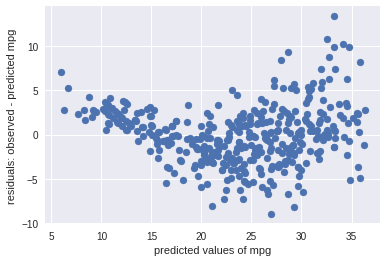

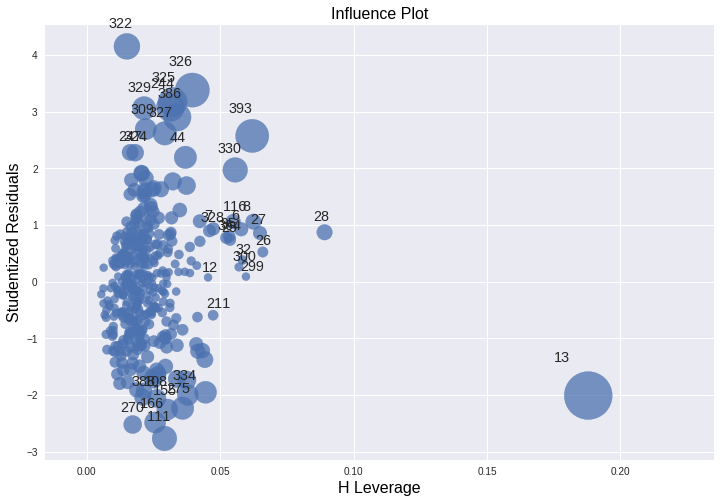

In [28]:
#PLOTS
#Use the plot() function to produce diagnostic plots of the linear regression fit.
# create object to represent predicted values of y: y_pred
y_pred = reg.predict(X)

#residual plot
# create object to represent residuals (difference between observed and predicted values)
resid = y - y_pred
plt.scatter(y_pred, resid)
plt.xlabel("predicted values of mpg")
plt.ylabel("residuals: observed - predicted mpg")
plt.show()

#Comment on any problems you see with the fit. 

# The plot of predicted values of mpg vs. the residuals indicates heteroscedasticity. 
# The plot also evidences a U-shape that suggests non-linearity of the data.
# Do the residual plots suggest any unusually large outliers? Plot studentized residuals to look for outliers.

# There are a few unusually large outliers (obs with studentized residuals that are > 3): 
#observations # 322, 325, 326, 329, 244, 386, 327.
    
#Does the leverage plot identify any observations with unusually high leverage? Compute leverage statistic and look
# for observations with leverage that far exceeds the average leverage of (p + 1)/n
    
# There are some observations with unusually high leverage (e.g., obs #13).
   
# use statsmodels to plot leverage and studentized residuals to detect outliers and observations with very high leverage
results = smf.ols('mpg ~ cylinders + displacement + weight + acceleration + year + origin_2 + origin_3 + hp_num', data=auto).fit()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

In [29]:
# ADDING INTERACTIONS TO THE LINEAR REGRESSION MODEL
#using a star we give the interaction and individual terms used
#convert origin from numeric to categorical
auto['origin_factor'] = auto['origin'].astype('category')
#interactions = smf.ols('mpg ~ cylinders * displacement * weight * acceleration * year * origin * hp_num', data=auto).fit()
   
interactions = smf.ols('mpg ~ cylinders * displacement * weight * acceleration * year * origin_factor * hp_num', data=auto).fit()
    
print(interactions.summary())
sorted(interactions.pvalues)
# Of 127 terms in the model with interactions, only 5 have p-values < .05. By chance, we would expect that roughly 6 
# terms would be significant. Thus, no terms are significant after adjusting for the Type 1 error rate.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          1.57e-122
Time:                        23:21:37   Log-Likelihood:                -793.07
No. Observations:                 397   AIC:                             1842.
Df Residuals:                     269   BIC:                             2352.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

[0.0012118308656111014,
 0.0012118310322491454,
 0.004683112177150158,
 0.00468311291601416,
 0.04405030521628846,
 0.0473290380612313,
 0.060340214702506854,
 0.060345783260069466,
 0.06277510235702208,
 0.06343191899284886,
 0.06998663734767067,
 0.07546819641410848,
 0.07650779193455605,
 0.08647976846274379,
 0.0924892791554206,
 0.09253015490365765,
 0.09329676286681317,
 0.09330580091940889,
 0.09670048151555237,
 0.11192293807342132,
 0.11878524686965221,
 0.12036392433083193,
 0.12355324297276775,
 0.13417582944193127,
 0.13779332498428132,
 0.1485631679749281,
 0.15237406686605032,
 0.1543467729857202,
 0.1555705371150467,
 0.15558603965926734,
 0.15659866244698378,
 0.15933282541550406,
 0.18980866093982765,
 0.19484289047759032,
 0.19632448189697568,
 0.198334847372355,
 0.19833503170260589,
 0.1994161553158074,
 0.2119166585827173,
 0.21960914111422986,
 0.22001184271006655,
 0.23508919330685732,
 0.23508923463784845,
 0.24728642888055966,
 0.25256646002000566,
 0.259119002

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          2.88e-142
Time:                        23:21:43   Log-Likelihood:                -1032.4
No. Observations:                 397   AIC:                             2083.
Df Residuals:                     388   BIC:                             2119.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2008 

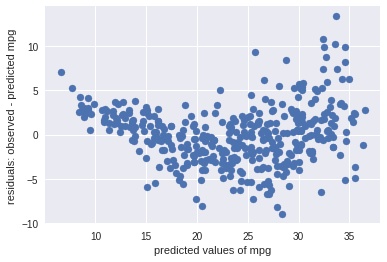

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     275.7
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.67e-155
Time:                        23:21:43   Log-Likelihood:                -1002.5
No. Observations:                 397   AIC:                             2023.
Df Residuals:                     388   BIC:                             2059.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        138.2559     11.167     12.

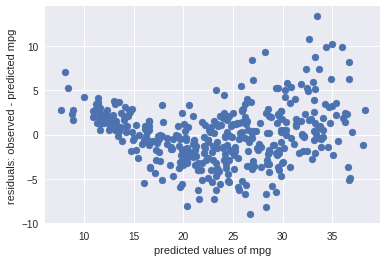

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     246.4
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.21e-147
Time:                        23:21:43   Log-Likelihood:                -1021.3
No. Observations:                 397   AIC:                             2061.
Df Residuals:                     388   BIC:                             2097.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.7065      8.361      1.

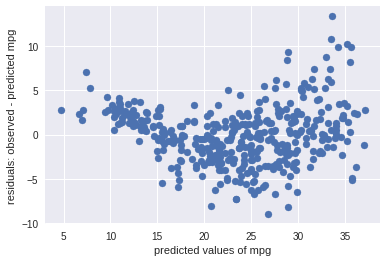

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     252.8
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          4.44e-156
Time:                        23:21:43   Log-Likelihood:                -996.79
No. Observations:                 397   AIC:                             2014.
Df Residuals:                     387   BIC:                             2053.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -11.7476      4.298     

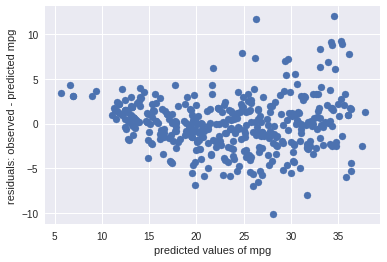

In [30]:
# Try different transformations of predictors to resolve problems with heteroscedasticity and non-linearity.
# log of X:

# log-transform displacement and rerun regression model
results = smf.ols('mpg ~ cylinders + np.log(displacement) + weight + acceleration + year + origin_2 + origin_3 + hp_num', data=auto).fit()
   
print(results.summary())
    
# create object to represent predicted or fitted values of y: y_pred
y_fitted = results.fittedvalues
    
#residual plot
# create object to represent residuals (difference between observed and predicted values)
resid_log = auto['mpg'] - y_pred
plt.scatter(y_fitted, resid_log)
plt.xlabel("predicted values of mpg")
plt.ylabel("residuals: observed - predicted mpg")
plt.show()
   
# log-transformation of displacement does not help.
   
# log-transform weight

results = smf.ols('mpg ~ cylinders + displacement + np.log(weight) + acceleration + year + origin_2 + origin_3 + hp_num', data=auto).fit()
    
print(results.summary())
    
# create object to represent predicted or fitted values of y: y_pred
y_fitted = results.fittedvalues

#residual plot
# create object to represent residuals (difference between observed and predicted values)
resid_log = auto['mpg'] - y_pred
plt.scatter(y_fitted, resid_log)
plt.xlabel("predicted values of mpg")
plt.ylabel("residuals: observed - predicted mpg")
plt.show()
    
# log-transform hp_num
   
results = smf.ols('mpg ~ cylinders + displacement + weight + acceleration + year + origin_2 + origin_3 + np.log(hp_num)', data=auto).fit()

print(results.summary())
    
# create object to represent predicted or fitted values of y: y_pred
y_fitted = results.fittedvalues
    
#residual plot
# create object to represent residuals (difference between observed and predicted values)
resid_log = auto['mpg'] - y_pred
plt.scatter(y_fitted, resid_log)
plt.xlabel("predicted values of mpg")
plt.ylabel("residuals: observed - predicted mpg")
plt.show()
   
# sqrt of X:
   
# X^2:
   
auto['displacement_sq'] = auto['displacement']*auto['displacement']
#  add quadratic term for displacement and rerun regression model
results = smf.ols('mpg ~ cylinders + displacement + displacement_sq + weight + acceleration + year + origin_2 + origin_3 + hp_num', data=auto).fit()

print(results.summary())
   
# create object to represent predicted or fitted values of y: y_pred
y_fitted = results.fittedvalues
    
#residual plot
# create object to represent residuals (difference between observed and predicted values)
resid_sq = auto['mpg'] - y_fitted
plt.scatter(y_fitted, resid_sq)
plt.xlabel("predicted values of mpg")
plt.ylabel("residuals: observed - predicted mpg")
plt.show()


In [31]:
carseats = pd.read_csv("https://raw.githubusercontent.com/cavaughan99/Data/master/Carseats.csv", index_col=0)

carseats.info()
carseats.describe()
    
carseats.Urban.value_counts()
carseats.US.value_counts()
   
def recode_cat(origin_var):
    
    if origin_var == 'Yes':
        return 1
    elif origin_var == 'No':
        return 0
    else:
        return np.nan

#recode urban and US to be numeric
carseats['Urban_num'] = carseats.Urban.apply(recode_cat)
carseats.Urban_num.value_counts()
    
carseats['US_num'] = carseats.US.apply(recode_cat)
carseats.US_num.value_counts()

carseats.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 13 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US  

In [32]:
# Fit a multiple regression model to predict Sales using Price, Urban, and US.

import statsmodels.formula.api as smf
import statsmodels.api as sm

# use R style formulas:
results = smf.ols('Sales ~ Price + Urban_num + US_num', data=carseats).fit()
  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           2.39e-23
Time:                        23:23:08   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

In [0]:
# Interpret each coefficient in the model.
#A .05 drop in price is associated with a one-unit increase in sales, which is a statistically significant association 
#(i.e., we can reject the null hypothesis that the association between price and sales is 0). Sales in the US are on 
# average 1.2 higher than those elsewhere, which is a statistically significant difference. However, urban vs. non-urban
# is not significantly associated with sales.

# Write out the model in equation form, being careful to handle the qualitative variables properly.
# Sales = 13.04 + price*-.05 + urban*-.02 + us*1.2

# For which of the predictors can you reject the null hypothesis Ho: Bj = 0?
#urban

In [33]:
# On the basis of your response to the previous question, fit a smaller model that only
# uses the predictors for which there is evidence of association with the outcome.
results2 = smf.ols('Sales ~ Price + US_num', data=carseats).fit()
    
print(results2.summary())

# How well do the models in (a) and (e) fit the data? 
#Similarly in that both have the same R^2.

# Using the model, obtain 95% CIs for the coefficient(s).
#price: 95%CI[-.07, -.04]
#us: 95%CI[.69, 1.71]

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           2.66e-24
Time:                        23:23:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

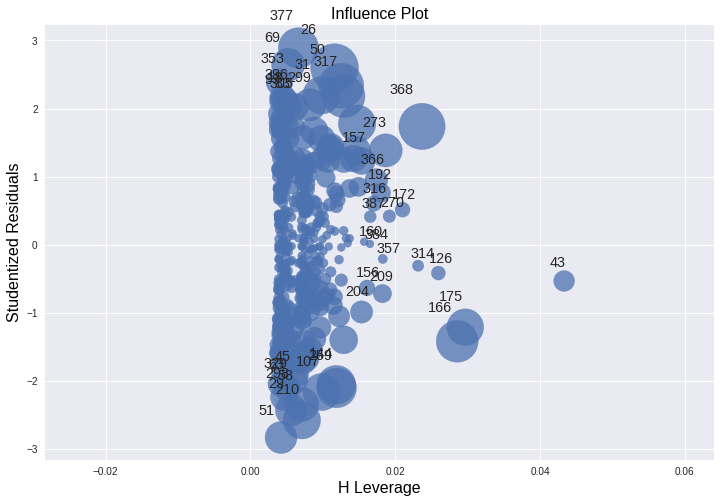

In [34]:
# Is there evidence of outliers or high leverage observations in the model from (e)?
# use statsmodels to plot leverage and studentized residuals to detect outliers and observations 
# with very high leverage.
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results2, ax=ax, criterion="cooks")